In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [38]:
circleData=pd.read_csv('training/circle.csv',header=None)
print('circle information')
# # Drop the first row
# circleData = circleData.drop(index=30)
# #Reset the index (optional, but often useful)
# circleData = circleData.reset_index(drop=True)
circleData.info()

lineData=pd.read_csv('training/line.csv',header=None)
print('line information')
# # Drop the first row
# lineData = lineData.drop(index=15)
# # Reset the index (optional, but often useful)
# lineData = lineData.reset_index(drop=True)
lineData.info()

recData=pd.read_csv('training/rec.csv',header=None)
print('rec information')
# # Drop the first row
# recData = recData.drop(index=15)
# # Reset the index (optional, but often useful)
# recData = recData.reset_index(drop=True)
recData.info()


circle information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     float64
 1   1       30 non-null     float64
 2   2       30 non-null     float64
 3   3       30 non-null     float64
 4   4       30 non-null     float64
 5   5       30 non-null     float64
 6   6       30 non-null     float64
 7   7       30 non-null     float64
 8   8       30 non-null     float64
 9   9       30 non-null     float64
 10  10      30 non-null     float64
 11  11      30 non-null     float64
 12  12      30 non-null     float64
 13  13      30 non-null     float64
 14  14      30 non-null     float64
 15  15      30 non-null     float64
 16  16      30 non-null     float64
 17  17      30 non-null     float64
 18  18      30 non-null     float64
 19  19      30 non-null     float64
 20  20      30 non-null     float64
 21  21      30 non-null   

In [39]:
circleData.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.1,0.02,-0.1,0.02,-0.1,0.00,-0.1,0.00,-0.1,0.00,...,0.00,0.0,0.00,-0.1,0.00,0.0,0.00,0.0,0.00,circle
1,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,circle
2,0.0,0.00,-0.1,0.00,-0.1,0.00,-0.1,0.00,-0.1,0.00,...,0.00,0.0,0.00,-0.1,0.00,-0.1,0.00,0.0,0.00,circle
3,0.0,0.00,-0.1,0.00,0.0,0.00,-0.1,0.00,-0.1,0.00,...,0.04,0.0,0.03,0.0,0.04,-0.1,0.02,-0.1,0.04,circle
4,0.0,0.06,-0.1,0.04,0.0,0.03,0.0,0.02,0.0,0.04,...,0.00,0.0,0.00,-0.1,0.00,-0.1,0.00,0.0,0.04,circle


In [40]:
lineData.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.0,0.02,0.0,0.01,0.0,0.02,0.0,0.02,0.0,0.02,...,0.02,-0.1,0.01,0.0,0.00,0.0,0.01,-0.1,0.00,line
1,0.0,0.08,-0.1,0.02,0.0,0.04,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.01,0.0,0.00,-0.1,0.00,line
2,0.0,0.00,0.0,0.06,0.0,0.02,0.0,0.00,0.0,0.00,...,0.00,0.0,0.01,-0.1,0.00,0.0,0.03,0.0,0.03,line
3,0.0,0.00,0.0,0.00,0.0,0.02,0.0,0.01,0.0,0.02,...,0.00,-0.1,0.00,0.0,0.00,0.0,0.00,-0.1,0.00,line
4,-0.1,0.00,-0.1,0.00,-0.1,0.00,0.0,0.00,-0.1,0.00,...,0.01,-0.1,0.01,0.0,0.04,0.0,0.04,0.0,0.02,line


In [41]:
recData.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,0.0,0.02,0.0,0.0,-0.1,0.0,0.04,0.06,0.0,0.01,...,0.02,-0.1,0.00,-0.1,0.0,-0.1,0.01,-0.1,0.00,rec
1,-0.1,0.02,-0.1,0.0,-0.1,0.0,-0.20,0.00,-0.2,0.00,...,-0.10,-0.2,-0.10,-0.2,-0.1,-0.2,-0.10,-0.1,-0.10,rec
2,-0.2,-0.10,-0.1,-0.1,-0.1,-0.1,-0.10,-0.10,-0.1,-0.10,...,0.00,0.0,0.00,0.0,0.0,-0.1,0.00,0.0,0.01,rec
3,0.0,0.00,-0.1,0.0,0.0,0.0,0.00,0.00,-0.1,0.00,...,-0.10,-0.1,-0.10,-0.1,-0.1,-0.1,-0.10,-0.1,-0.10,rec
4,-0.1,-0.10,-0.1,-0.1,-0.1,-0.1,-0.10,-0.10,-0.1,-0.10,...,0.00,0.0,0.01,0.0,0.0,0.0,0.00,-0.1,0.00,rec


In [42]:
all_shape_data = pd.concat([circleData, lineData, recData], axis=0, ignore_index=True)
print(all_shape_data.info())
all_shape_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90 non-null     float64
 1   1       90 non-null     float64
 2   2       90 non-null     float64
 3   3       90 non-null     float64
 4   4       90 non-null     float64
 5   5       90 non-null     float64
 6   6       90 non-null     float64
 7   7       90 non-null     float64
 8   8       90 non-null     float64
 9   9       90 non-null     float64
 10  10      90 non-null     float64
 11  11      90 non-null     float64
 12  12      90 non-null     float64
 13  13      90 non-null     float64
 14  14      90 non-null     float64
 15  15      90 non-null     float64
 16  16      90 non-null     float64
 17  17      90 non-null     float64
 18  18      90 non-null     float64
 19  19      90 non-null     float64
 20  20      90 non-null     float64
 21  21      90 non-null     float64
 22  22  

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-0.1,0.02,-0.1,0.02,-0.1,0.00,-0.1,0.00,-0.1,0.00,...,0.00,0.0,0.00,-0.1,0.00,0.0,0.00,0.0,0.00,circle
1,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,circle
2,0.0,0.00,-0.1,0.00,-0.1,0.00,-0.1,0.00,-0.1,0.00,...,0.00,0.0,0.00,-0.1,0.00,-0.1,0.00,0.0,0.00,circle
3,0.0,0.00,-0.1,0.00,0.0,0.00,-0.1,0.00,-0.1,0.00,...,0.04,0.0,0.03,0.0,0.04,-0.1,0.02,-0.1,0.04,circle
4,0.0,0.06,-0.1,0.04,0.0,0.03,0.0,0.02,0.0,0.04,...,0.00,0.0,0.00,-0.1,0.00,-0.1,0.00,0.0,0.04,circle


c:\Users\lol\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


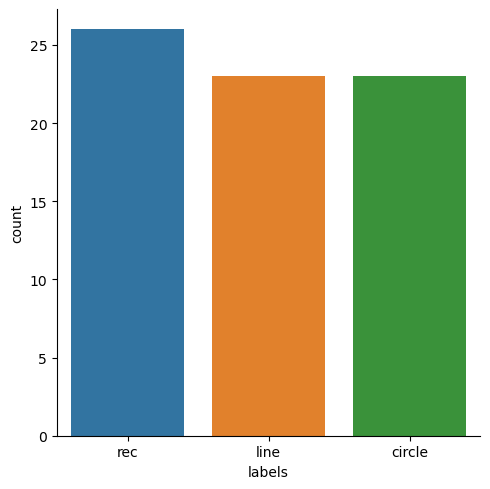

In [43]:
# Input
X = all_shape_data.loc[:,:89]
#output
y = all_shape_data.loc[:,90]
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

# Convert the Series to a DataFrame
df = pd.DataFrame({'labels': y_train})

# Plot the distribution of data labels using sns.catplot
sns.catplot(x="labels",kind = 'count', data = df)

In [44]:
class_0=X_train[y_train=='circle']
class_0_label=y_train[y_train=='circle']
class_1=X_train[y_train=='line']
class_1_label=y_train[y_train=='line']
class_2=X_train[y_train=='rec']
class_2_lable=y_train[y_train=='rec']

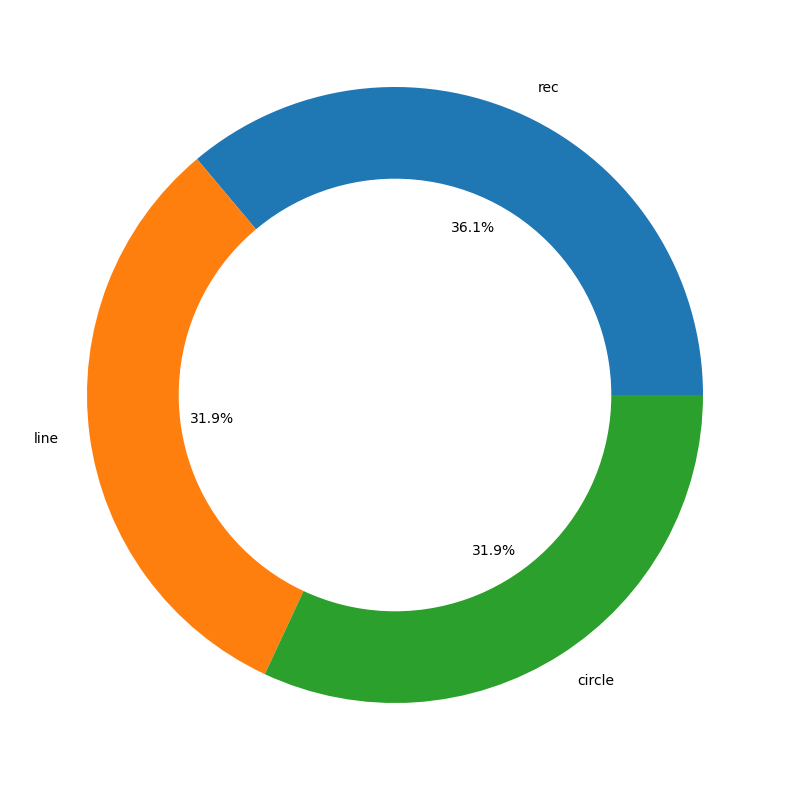

In [45]:
plt.figure(figsize= (10,10))
my_circle = plt.Circle((0,0), 0.7, color = 'white')
label_counts = y_train.value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [46]:
from sklearn.svm import SVC
from sklearn import metrics
from joblib import dump

In [47]:
# Create an SVM classifier, based on SVC.  The SVC is created \
# using the default settings with linear kernel. Provision of \
# "auto" gamma parameter to default kernel makes classificator \
# next to maximally rigid here ("random_state" parameter can be any).

model = SVC(kernel='poly', degree=2)

# Train the model using the training sets.
model.fit(X_train, y_train)

# Accuracy on the train data
print(f'The accuracy of the SVM model on train data = {model.score(X_train,y_train)*100:.3}%')

The accuracy of the SVM model on train data = 80.6%


In [ ]:
dump(model, 'svm_model.joblib')

In [48]:
# Predict the response for test dataset.
y_pred = model.predict(X_test)

# Accuracy on the test data
print(f'The Accuracy of the SVM model on test data = {metrics.accuracy_score(y_test, y_pred) * 100:.3}%')
# print(f'The Sensitivity of the SVM model on test data = {metrics.recall_score(y_test, y_pred, pos_label=1) * 100:.3}%')
# print(f'The Specificity of the SVM model on test data = {metrics.recall_score(y_test, y_pred, pos_label=0) * 100:.3}%')

The Accuracy of the SVM model on test data = 77.8%


In [49]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm


array([[6, 1, 0],
       [0, 7, 0],
       [0, 3, 1]], dtype=int64)

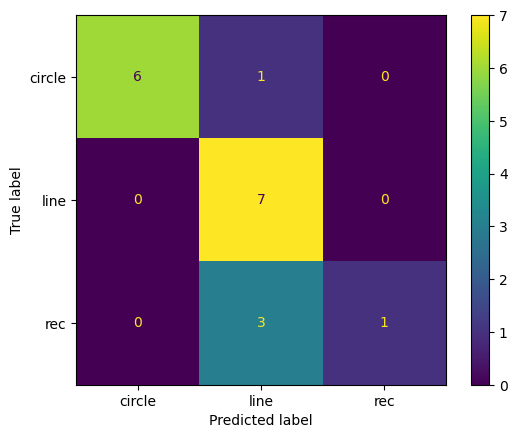

In [50]:
class_names = ['circle', 'line', 'rec']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis')  # or any other colormap you prefer
#matrix = metrics.ConfusionMatrixDisplay(cm).plot()